In [3]:
 pip install --upgrade jupyterlab-git

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install kagglehub

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\slrob\.cache\kagglehub\datasets\spscientist\students-performance-in-exams\versions\1


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
data_file = pd.read_csv(path+"/StudentsPerformance.csv")
data_file

,gender,student number,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,1,group B,bachelor's degree,standard,none,72,72,74
1,female,2,group C,some college,standard,completed,69,90,88
2,female,3,group B,master's degree,standard,none,90,95,93
3,male,4,group A,associate's degree,free/reduced,none,47,57,44
4,male,5,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
995,female,996,group E,master's degree,standard,completed,88,99,95
996,male,997,group C,high school,free/reduced,none,62,55,55
997,female,998,group C,high school,free/reduced,completed,59,71,65
998,female,999,group D,some college,standard,completed,68,78,77


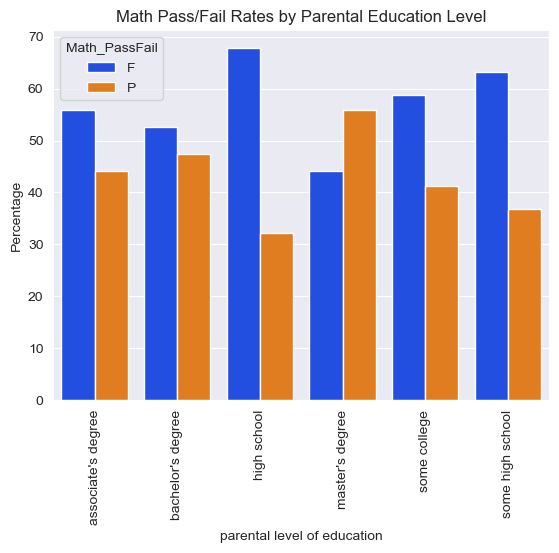

In [7]:
passmark=70
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data_file` is your DataFrame and `passmark` is defined
data_file["Math_PassFail"] = np.where(data_file["math score"] < passmark, "F", "P")

# Calculate normalized percentages
normalized_counts = (
    data_file.groupby("parental level of education")["Math_PassFail"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percentage")
    .reset_index()
)

# Plot normalized percentages
sns.barplot(
    x="parental level of education",
    y="percentage",
    hue="Math_PassFail",
    data=normalized_counts,
    palette="bright",
)
plt.xticks(rotation=90)
plt.ylabel("Percentage")
plt.title("Math Pass/Fail Rates by Parental Education Level")
plt.show()

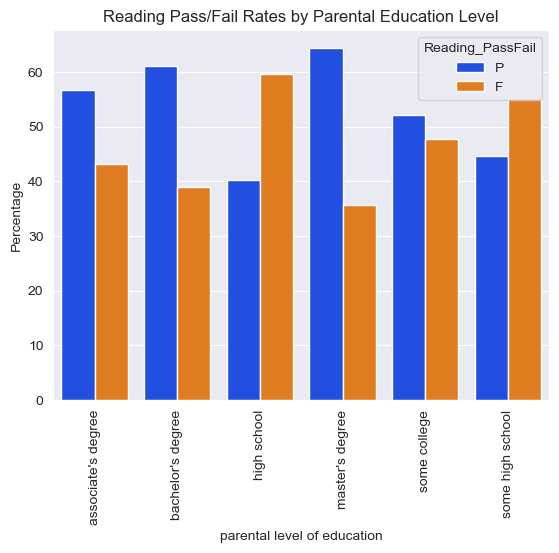

In [8]:
# Assuming `data_file` is your DataFrame and `passmark` is defined
data_file["Reading_PassFail"] = np.where(data_file["reading score"] < passmark, "F", "P")

# Calculate normalized percentages
normalized_counts = (
    data_file.groupby("parental level of education")["Reading_PassFail"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percentage")
    .reset_index()
)

# Plot normalized percentages
sns.barplot(
    x="parental level of education",
    y="percentage",
    hue="Reading_PassFail",
    data=normalized_counts,
    palette="bright",
)
plt.xticks(rotation=90)
plt.ylabel("Percentage")
plt.title("Reading Pass/Fail Rates by Parental Education Level")
plt.show()

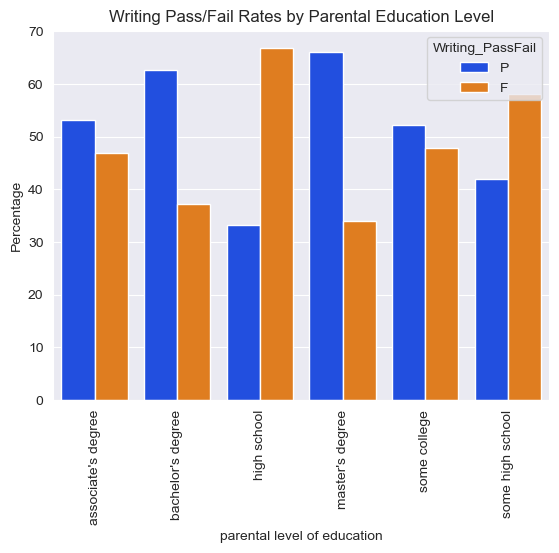

In [9]:

# Assuming `data_file` is your DataFrame and `passmark` is defined
data_file["Writing_PassFail"] = np.where(data_file["writing score"] < passmark, "F", "P")

# Calculate normalized percentages
normalized_counts = (
    data_file.groupby("parental level of education")["Writing_PassFail"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percentage")
    .reset_index()
)

# Plot normalized percentages
sns.barplot(
    x="parental level of education",
    y="percentage",
    hue="Writing_PassFail",
    data=normalized_counts,
    palette="bright",
)
plt.xticks(rotation=90)
plt.ylabel("Percentage")
plt.title("Writing Pass/Fail Rates by Parental Education Level")
plt.show()

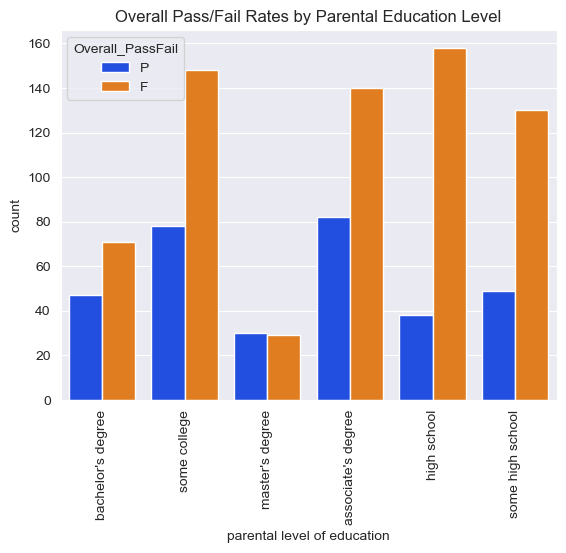

In [19]:
data_file["Overall_PassFail"] = data_file.apply(lambda x: "F" if x["Math_PassFail"]== 'F' 
                                     or x["Reading_PassFail"]== 'F' or x["Writing_PassFail"]== 'F'
                                    else 'P' , axis =1)
p=sns.countplot(x="parental level of education",hue="Overall_PassFail",data=data_file,palette="bright") 
# we compare it to hue
plt.xticks(rotation=90)
plt.title("Overall Pass/Fail Rates by Parental Education Level")
plt.show()

In [21]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
target_encoder = preprocessing.TargetEncoder()
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   student number               1000 non-null   int64 
 2   race/ethnicity               1000 non-null   object
 3   parental level of education  1000 non-null   object
 4   lunch                        1000 non-null   object
 5   test preparation course      1000 non-null   object
 6   math score                   1000 non-null   int64 
 7   reading score                1000 non-null   int64 
 8   writing score                1000 non-null   int64 
 9   Math_PassFail                1000 non-null   object
 10  Reading_PassFail             1000 non-null   object
 11  Writing_PassFail             1000 non-null   object
 12  Overall_PassFail             1000 non-null   object
dtypes: int64(4), object(9)
memory usag

In [23]:
data_file

,gender,student number,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassFail,Reading_PassFail,Writing_PassFail,Overall_PassFail
0,female,1,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
1,female,2,group C,some college,standard,completed,69,90,88,F,P,P,F
2,female,3,group B,master's degree,standard,none,90,95,93,P,P,P,P
3,male,4,group A,associate's degree,free/reduced,none,47,57,44,F,F,F,F
4,male,5,group C,some college,standard,none,76,78,75,P,P,P,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,996,group E,master's degree,standard,completed,88,99,95,P,P,P,P
996,male,997,group C,high school,free/reduced,none,62,55,55,F,F,F,F
997,female,998,group C,high school,free/reduced,completed,59,71,65,F,P,F,F
998,female,999,group D,some college,standard,completed,68,78,77,F,P,P,F


In [27]:
CorrelationData=data_file[['math score','reading score','writing score']].corr()
CorrelationData

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [39]:
data_file.shape
df_encoded = data_file.copy()
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Create a copy of the DataFrame to encode
df_encoded = data_file.copy()

# Label encode binary categorical columns
binary_cols = ['gender', 'Math_PassFail', 'Reading_PassFail', 'Writing_PassFail', 'Overall_PassFail']
label_encoder = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# One-hot encode non-binary categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['math score', 'reading score', 'writing score']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_encoded = df_encoded.drop(columns=['student number'])

print(df_encoded.head())
print(df_encoded.info())


   gender  math score  reading score  writing score  Math_PassFail  \
0       0    0.390024       0.193999       0.391492              1   
1       0    0.192076       1.427476       1.313269              0   
2       0    1.577711       1.770109       1.642475              1   
3       1   -1.259543      -0.833899      -1.583744              0   
4       1    0.653954       0.605158       0.457333              1   

   Reading_PassFail  Writing_PassFail  Overall_PassFail  \
0                 1                 1                 1   
1                 1                 1                 0   
2                 1                 1                 1   
3                 0                 0                 0   
4                 1                 1                 1   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                    True                   False                   False   
1                   False                    True                   Fa

In [41]:
# Define features (X) and labels (y)
X = df_encoded.drop(columns=['Overall_PassFail'])  # Assuming 'Overall_PassFail' is the target
y = df_encoded['Overall_PassFail']

# Split into train-test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier  # or any classifier of choice
from sklearn.ensemble import RandomForestRegressor

categorical_features = ['gender_male', 'test preparation course_none', 'lunch_standard']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ])
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])
model.fit(X_train, y_train)

# Evaluate
score = model.score(X_test, y_test)
print(f'Validation Accuracy: {score}')


NameError: name 'X_train' is not defined

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define Keras model for regression
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='tanh'),
    Dense(32, activation='softmax'),
    Dense(1)  # Single output for regression
])

# Compile the model with mean squared error loss for regression
#model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32)

loss, accuracy = model.evaluate(X_test,y_test)
print(f'Accuracy {accuracy}')

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
# Define Keras model for regression
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='sigmoid'),
    Dense(32, activation='softmax'),
    Dense(1)  # Single output for regression
])

# Compile the model with mean squared error loss for regression
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['mae'])
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['mae'])

# Train the model
history = model.fit(Wr_train, wrGold_train, validation_data=(Wr_test, wrGold_test), epochs=20, batch_size=32)

loss, accuracy = model.evaluate(Wr_test,wrGold_test)
print(f'Accuracy {accuracy}')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='parental level of education', y='math score', data=data_file)
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.violinplot(x='parental level of education', y='writing score', data=data_file)
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.violinplot(x='parental level of education', y='reading score', data=data_file)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler

def Preprocessing(df):
    df.rename(columns = {"test preparation course":"test_preparation_course",
                       "parental level of education": "parental_level_of_education",
                        "math score":"math_score","reading score":"reading_score",
                        "writing score":"writing_score"},inplace=True) # Here I changed the name of the columns to the desired name
    
    data_obj = df.select_dtypes("object")   
    data_number = df.select_dtypes("int64") 
        
    label = data_number["math_score"]
    data_number.drop(columns=["math_score"])
    
    #data_obj.gender[data_obj.gender == "female"] = 0
    #data_obj.gender[data_obj.gender == "male"] = 1
    data_obj.loc[data_obj.gender == "female", "gender"] = 0
    data_obj.loc[data_obj.gender == "male", "gender"] = 1
    
    #data_obj.lunch[data_obj.lunch == "standard"] = 0
    #data_obj.lunch[data_obj.lunch == "free/reduced"] = 1
    data_obj.loc[data_obj.lunch == "standard"] = 0
    data_obj.loc[data_obj.lunch == "free/reduced"] = 1
    
    data_obj.loc[data_obj.test_preparation_course == "none"] = 0
    data_obj.loc[data_obj.test_preparation_course == "completed"] = 1
    
    data_obj_01 = data_obj[["gender","lunch","test_preparation_course"]]
        
    data_obj.drop(columns = ["gender","lunch","test_preparation_course"],inplace = True)
    
    lab = LabelEncoder()
    data_obj = data_obj.apply(lab.fit_transform)
    
     
    
    ohe = OneHotEncoder()
    data_ohe = ohe.fit_transform(data_obj.values).toarray()
    
    
    
    
    fin_df = np.concatenate([data_number.values,data_obj_01.values,data_ohe],axis = 1)
    min_max_scale = MinMaxScaler()
    fin_df = min_max_scale.fit_transform(fin_df)
    
    return fin_df ,label

In [ ]:
df = data_file.copy()
data ,label = Preprocessing(df)
data

In [ ]:
X1_train,X1_test,y1_train,y1_test = train_test_split(data,label,test_size=0.26)
dtr = DecisionTreeRegressor(max_depth = 3)
dtr.fit(X1_train,y1_train)
dtr.score(X1_train,y1_train)
dtr.score(X1_test,y1_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, r2_score
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X1_train, y1_train)

# Make predictions on the test set
y_pred = model.predict(X1_test)

# Evaluate the model
mse = mean_squared_error(y1_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y1_test, model.predict(y1_test)) * 100


In [ ]:
# Define Keras model for regression
model = Sequential([
    Dense(64, input_shape=(X1_train.shape[1],), activation='sigmoid'),
    Dense(32, activation='softmax'),
    Dense(1)  # Single output for regression
])

# Compile the model with mean squared error loss for regression
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['mae'])
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['mae'])

# Train the model
history = model.fit(X1_train, y1_train, validation_data=(X1_test, y1_test), epochs=20, batch_size=32)

loss, accuracy = model.evaluate(X1_test,y1_test)
print(f'Accuracy {accuracy}')

In [57]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor need to pip install catboost and xgboost if want to use these
#from xgboost import XGBRegressor
import warnings

df = pd.read_csv(path+"/StudentsPerformance.csv")
df.head()

,gender,student number,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,1,group B,bachelor's degree,standard,none,72,72,74
1,female,2,group C,some college,standard,completed,69,90,88
2,female,3,group B,master's degree,standard,none,90,95,93
3,male,4,group A,associate's degree,free/reduced,none,47,57,44
4,male,5,group C,some college,standard,none,76,78,75


In [69]:
X = df.drop(columns=['math score'],axis=1)
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [73]:
y = df['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [75]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

X = preprocessor.fit_transform(X)

# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 20), (200, 20))

In [77]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [85]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    #"XGBRegressor": XGBRegressor(), 
    #"CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3225
- Mean Absolute Error: 4.2648
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2207
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3228
- Mean Absolute Error: 4.2635
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3905
- Mean Absolute Error: 4.2180
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 6.0151
- Mean Absolute Error: 4.7820
- R2 Score: 0.8395
-----------------------

In [87]:
#this replicates above. Same outcome
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04
